In [ ]:
# 1. Read the CSV file
# 2. In the content field, do the following:
# - Tokenize and lower-case the text (end result should be an array of tokens where each token is a lexical unit or a punctuation). For example, “He said: ‘Don’t go there!’” => (he, said, :, ‘, don’t, go, there, !, ‘)
# - Remove consecutive spaces and new lines
# - Find and replace URLs with <URL>
# - Find and replace dates with <DATE>
# - Find and replace numbers with <NUM>
# 3. For the metadata fields:
# - Fill all empty fields with a placeholder NULL


In [18]:
import numpy as np
import pandas as pd 
import re
import nltk
from nltk.tokenize import TweetTokenizer, ToktokTokenizer
from collections import Counter 
import itertools
import matplotlib.pyplot as plt
import csv


In [19]:
#Function to read a csv-file from URL
def readUrl(url):
    data = pd.read_csv(url)
    return data
#Function to find and replace URLs with <URL>
def swapUrl(line):
    urlPattern = r'((http|https)\:\/\/)?[a-zA-Z0-9\.\/\?\:@\-_=#]+\.([a-zA-Z]){2,6}([a-zA-Z0-9\.\&\/\?\:@\-_=#])*'
    line = re.sub(urlPattern,' <URL> ', line)
    return line
#Function to find and replace dates with <DATE>
def swapDates(line):
    re1 = r'[\d]{1,2}(th)? [adfjmnos]\w*[,]?[.]? ([\d]{2,4})?'
    re2 = r'[adfjmnos]\w*[,]?[.]? [\d]{1,2}(th)?[,]? ([\d]{2,4})?'
    re3 = r'[adfjmnos]\w* [\d]{1,2}[,]?[.]?([\d]{2,4})?'
    re4 = r'[\d]{1,2}-[\d]{1,2}-[\d]{2,4}'
    re5 = r'[\d]{1,2}/[\d]{1,2}/[\d]{2,4}'
    re6 = r'[\d]{1,2} [\d]{1,2} [\d]{2,4}'
    re7 = r'[\d].{1,2}.[\d]{1,2}.[\d]{2,4}'
    finReg = [re1, re2, re3, re4, re5, re6, re7]
    for reg in finReg:
        line = re.sub(reg, ' <DATE> ', line)
    return line

#Function to find and replace numbers with <NUM>
def swapNumb(line):
    pattern = r'[\d]+[,]?([\d]+)?'
    line = re.sub(pattern, ' <NUM> ', line)
    return line

#Functions to count no. of dates, numbers and url.
#Could be done earlier
def counter(data):
    countDict = {'DATE': 0, 'URL': 0, 'NUM': 0}
    for line in data:
        for key in countDict:
            countDict[key] += line.count('<'+str(key) + '>') 
    return countDict

#Function to count k-most frequent words. 
def wordCount(content, k):
    #Takes the whole content, which is a tokenized list and 
    # flattens it to one long list.
    flatten = list(itertools.chain.from_iterable(content))
    # Defines regex for all non-ASCII characters
    punct = re.compile(r'\W')
    #Filters out all non-ASCII characters
    filtered = filter(lambda i: not punct.search(i), flatten)
    #Counts frequency of words
    counter = Counter(filtered)
    #Returns k-most frequent words
    most_freq = counter.most_common(k)
    return most_freq

    

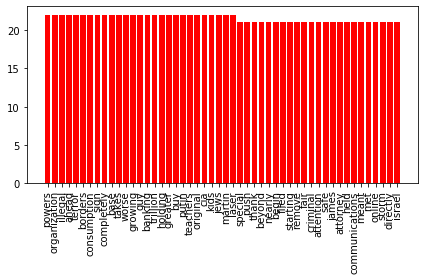

In [26]:
rawData = readUrl('https://raw.githubusercontent.com/several27/FakeNewsCorpus/master/news_sample.csv')
token = TweetTokenizer()
tokenizedList = []
for line in rawData['content']:
    line = line.lower()
    pattern = re.compile(r'\s+')
    line = re.sub(pattern, ' ', line)
    line = line.rstrip('\n')
    line = swapUrl(line)
    line = swapDates(line)
    line = swapNumb(line)
    tokenizedList.append(token.tokenize(line))
rawData['content'] = tokenizedList
metaList = []
for line in rawData['meta_keywords']:
    if (line ==  "['']"):
        metaList.append(np.nan)
    else: 
        metaList.append(line)
rawData['meta_keywords'] = metaList
#Counts DATE,URL & NUM
count = counter(rawData['content'])
#Counts words
counted = wordCount(rawData['content'], 1000)

#Attempt to write to csv-file
with open('./word.csv','w') as out:
    csv_out=csv.writer(out)
    csv_out.writerow(['word','freq'])
    for row in counted:
        csv_out.writerow(row)
        
indices = np.arange(len(counted[950:]))
word, frequency = zip(*counted[950:])
plt.bar(indices, frequency, color='r')
plt.xticks(indices, word, rotation='vertical')
plt.tight_layout()
plt.show()
    








In [3]:
#TESTS: 

test = swapUrl('https://www.youtube.com/watch?v=cJymBJ_5iUg')
print(test)
dateTest = []
dateTest.append(swapDates('17/11/1996'))
dateTest.append(swapDates('17 november 1996'))
dateTest.append(swapDates('17-11-1996'))
dateTest.append(swapDates('17 jun 2018'))
dateTest.append(swapDates('nov 17 1996'))
dateTest.append(swapDates('january, 15 '))
dateTest.append(swapDates('17 november '))
dateTest.append(swapDates('jan. 15 2018'))
dateTest.append(swapDates('jan 31.2018'))
dateTest.append(swapNumb('halla 123 hall 732,189'))
t = ['This is a <DATE> and <URL> <URL> comes up <NUM> <NUM> <NUM>', '<DATE> as <DATE> asd <DATE> asd <URL> <NUM>']
dictio = counter(t)
t = [['a', 'c', 'jsd'], ['d', 'a', 'a', 'c']]
print(wordCount(t, 2))
print(dictio)
#for elm in dateTest:
    #print(elm)

 <URL> 
['a', 'c', 'jsd', 'd', 'a', 'a', 'c']
[('a', 3), ('c', 2)]
{'DATE': 4, 'URL': 3, 'NUM': 4}
